<a href="https://colab.research.google.com/github/ggarci10/4961kaur/blob/main/Senior_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score


In [ ]:
import pandas as pd

In [ ]:
RDR = pd.read_csv("https://raw.githubusercontent.com/ggarci10/4961kaur/main/RawData-Regina-June-2023.csv")

In [ ]:
print(RDR)

         id  meterNumber            gw      flow            tf        fr  fim  \
0     72720     19240566  b827eb5e5925  0.000000  89399.500000  0.043590  NaN   
1     72721     19240566  b827eb5e5925  0.000000  89399.500000  0.000000  NaN   
2     72722     19240566  b827eb5e5925  0.265625  89399.765625  0.000000  NaN   
3     72723     19240566  b827eb5e5925  1.851562  89401.617188  0.062082  NaN   
4     72724     19240566  b827eb5e5925  0.000000  89401.617188  0.058560  NaN   
...     ...          ...           ...       ...           ...       ...  ...   
3200  77170     19240566  b827eb5e5925  0.000000  89798.406250  0.000000  NaN   
3201  77171     19240566  b827eb5e5925  0.000000  89798.406250  0.043590  NaN   
3202  77172     19240566  b827eb5e5925  0.000000  89798.406250  0.000000  NaN   
3203  77173     19240566  b827eb5e5925  0.000000  89798.406250  0.039627  NaN   
3204  77174     19240566  b827eb5e5925  0.000000  89798.406250  0.000000  NaN   

               meterLocalTi

In [ ]:
#DA = pd.read_csv("https://raw.githubusercontent.com/ggarci10/4961kaur/main/ReginaLeakNotificationDataAllYear2022-23.csv?token=GHSAT0AAAAAACJ45HEHYZRDGGC6RO2IY4OUZKJPJMQ")

In [ ]:
#print(DA)

In [ ]:
#WCS = pd.read_csv("https://raw.githubusercontent.com/ggarci10/4961kaur/main/WaterClassifySummary.csv?token=GHSAT0AAAAAACJ45HEHKFQRSBOP7HXUN5LIZKJPG4Q")

In [ ]:
#print(WCS)

In [ ]:
#WCDF = pd.read_csv("https://raw.githubusercontent.com/ggarci10/4961kaur/main/WatreClassifyDataFrame.csv?token=GHSAT0AAAAAACJ45HEGYFZJMGODJBJWVNBQZKJPH3A")

In [ ]:
#print(WCDF)

**dummy file for testing**

In [ ]:
df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_s2.csv")

In [ ]:
print(df)

     Age     ChestPain  RestBP  Chol  RestECG  MaxHR  Oldpeak        Thal  AHD
0     63       typical     145   233        2    150      2.3       fixed   No
1     67  asymptomatic     160   286        2    108      1.5      normal  Yes
2     67  asymptomatic     120   229        2    129      2.6  reversable  Yes
3     37    nonanginal     130   250        0    187      3.5      normal   No
4     41    nontypical     130   204        2    172      1.4      normal   No
..   ...           ...     ...   ...      ...    ...      ...         ...  ...
296   45       typical     110   264        0    132      1.2  reversable  Yes
297   68  asymptomatic     144   193        0    141      3.4  reversable  Yes
298   57  asymptomatic     130   131        0    115      1.2  reversable  Yes
299   57    nontypical     130   236        2    174      0.0      normal  Yes
300   38    nonanginal     138   175        0    173      0.0      normal   No

[301 rows x 9 columns]


# Feature importance TESTER

                    Age      RestBP        Chol   RestECG       MaxHR  \
ClusterLabel                                                            
0             53.164835  130.824176  236.582418  0.890110  159.351648   
1             57.672566  134.044248  256.743363  1.203540  136.000000   
2             51.388889  129.305556  244.250000  0.833333  163.666667   

               Oldpeak  Thal_fixed  Thal_normal  Thal_reversable  \
ClusterLabel                                                       
0             0.801099    0.032967     0.780220         0.186813   
1             1.484956    0.088496     0.283186         0.628319   
2             0.258333    0.055556     0.777778         0.166667   

              ChestPain_asymptomatic  ChestPain_nonanginal  \
ClusterLabel                                                 
0                           0.120879              0.703297   
1                           0.911504              0.053097   
2                           0.000000         

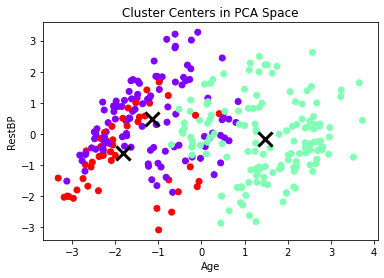

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create dummy columns using get_dummies function and selecting the columns 'Thal' and 'ChestPain'
df_encoded = pd.get_dummies(df, columns=['ChestPain', 'Thal'])

# Define feature columns
feature_cols = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak', 'Thal_fixed', 'Thal_normal', 'Thal_reversable',
                'ChestPain_asymptomatic', 'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical']

# Extract features
X = df_encoded[feature_cols]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering (example with 3 clusters)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_encoded['ClusterLabel'] = cluster_labels

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Use Cluster labels for unsupervised clustering evaluation (accuracy is not applicable for unsupervised methods)
train_cluster_labels = X_train['ClusterLabel']
test_cluster_labels = X_test['ClusterLabel']

cluster_means = X_train.groupby('ClusterLabel')[feature_cols].mean()
print(cluster_means)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Age')
plt.ylabel('RestBP')
plt.title('Cluster Centers in PCA Space')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

train_silhouette_score = silhouette_score(X_train[feature_cols], train_cluster_labels)
test_silhouette_score = silhouette_score(X_test[feature_cols], test_cluster_labels)

print(f"Train Silhouette Score: {train_silhouette_score}")
print(f"Test Silhouette Score: {test_silhouette_score}")

Train Silhouette Score: -0.04615525657830622
Test Silhouette Score: -0.028551464293050922


In [ ]:
print("HELLO!")

HELLO!


In [ ]:
print("github")

In [ ]:
print("idk")

In [ ]:
print("KOBE")